In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
dataset = pd.read_csv('dataanime.csv')
dataset.sample(5)

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
137,Fate/stay night Movie: Heaven's Feel - I. Pres...,Movie,1,Finished Airing,2017-10-14,-,-,-,"Aniplex,Notes",Aniplex of America,ufotable,Visual novel,"Action,Fantasy,Magic,Supernatural",2 hr.,R,8.43,8087,98539,551,The Holy Grail War: a violent battle between m...
753,Bokura wa Minna Kawai-sou,TV,12,Finished Airing,2014-4-4,2014-6-20,Spring,-,TBS,Sentai Filmworks,Brain's Base,Manga,"Slice of Life,Comedy,Romance,School",24 min. per ep.,PG-13,7.84,113467,212209,1495,Kazunari Usa is a high school freshman who wil...
309,Lovely★Complex,TV,24,Finished Airing,2007-4-7,2007-9-29,Spring,-,"TBS,TAP,Sony Music Entertainment,Shueisha,Nichion",Discotek Media,Toei Animation,Manga,"Comedy,Romance,Shoujo",24 min. per ep.,PG-13,8.18,158470,298835,6978,Love is unusual for Koizumi Risa and Ootani At...
486,Hibike! Euphonium,TV,13,Finished Airing,2015-4-8,2015-7-1,Spring,Wednesdays at 00:30 (JST),"Lantis,Pony Canyon,Rakuonsha",Ponycan USA,Kyoto Animation,Novel,"Music,School,Drama",23 min. per ep.,PG-13,8.02,92899,200810,3291,After swearing off music due to an incident at...
784,Dragon Ball Z Special 2: Zetsubou e no Hankou!...,Special,1,Finished Airing,1993-2-24,-,-,-,-,Funimation,Toei Animation,Manga,"Adventure,Drama,Fantasy,Shounen",48 min.,PG-13,7.82,35898,55329,170,It has been thirteen years since the Androids ...


In [11]:
# dataset.columns
dataset.keys()

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [12]:
dataset.nunique()

Title              1563
Type                  6
Episodes            107
Status                2
Start airing       1170
End airing          761
Starting season       5
Broadcast time      199
Producers           809
Licensors           111
Studios             200
Sources              14
Genres             1004
Duration            171
Rating                5
Score               146
Scored by          1548
Members            1548
Favorites           924
Description        1545
dtype: int64

In [38]:
# new_ds = dataset.drop(['Title','Episodes' ,'Producers','Licensors','Starting_season','Studios','Genres', 'Duration', 'Members','Favorites','Description','Start_airing' ,'End_airing', 'Broadcast_time' ,'Scored_by'],axis=1)
new_ds = dataset.drop(['Title','Episodes' ,'Producers','Licensors','Starting season','Studios','Genres','Duration', 'Members','Favorites','Description','Start airing' ,'End airing', 'Broadcast time' ,'Scored by'],axis=1)

## Data Preprocessing

In [47]:
new_ds.dropna(inplace=True) 

In [48]:
new_ds.isna().sum()

Type       0
Status     0
Sources    0
Rating     0
Score      0
dtype: int64

In [49]:
new_ds["Status"]= new_ds["Status"].replace("Finished Airing", "0") 
new_ds["Status"]= new_ds["Status"].replace("Currently Airing", "1") 

new_ds = new_ds[new_ds.Type!='Music']
new_ds = new_ds[new_ds.Type!='ONA']
new_ds = new_ds[new_ds.Type!='Special']
new_ds = new_ds[new_ds.Type!='OVA']

new_ds["Rating"]= new_ds["Rating"].replace("R", "5") 
new_ds["Rating"]= new_ds["Rating"].replace("PG-13", "4") 
new_ds["Rating"]= new_ds["Rating"].replace("PG", "3") 
new_ds["Rating"]= new_ds["Rating"].replace("G", "2") 
new_ds["Rating"]= new_ds["Rating"].replace("None", "1") 

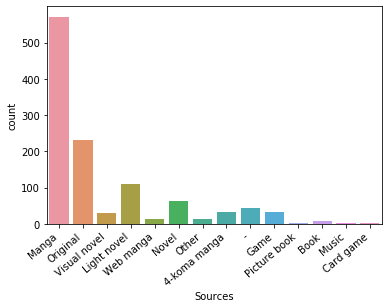

In [63]:
ax = sns.countplot(new_ds.Sources)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [64]:
new_ds["Sources"]= new_ds["Sources"].replace("Manga", "1") 
new_ds["Sources"]= new_ds["Sources"].replace("Original", "2") 
new_ds['Sources'].replace(to_replace=['Light novel','Novel','Visual novel','Web manga','Other','4-koma manga','-','Game','Picture book','Book','Music','Card game'],
    value='3',
    inplace=True
)

In [252]:
new_ds.head()

,Type,Status,Sources,Rating,Score
0,TV,0,1,5,9.25
1,Movie,0,2,4,9.19
2,TV,0,1,5,9.16
3,TV,1,3,4,9.16
4,TV,0,3,4,9.14


In [66]:
new_ds.Sources.value_counts()

1    571
3    353
2    230
Name: Sources, dtype: int64

In [67]:
x=new_ds.drop('Type',axis=1).values
y=new_ds.Type.values

In [68]:
x.shape

(1154, 4)

In [69]:
y.shape

(1154,)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [71]:
sc=StandardScaler()

In [72]:
x=sc.fit_transform(x)

In [180]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=0,stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(923, 4) (231, 4) (923,) (231,)


## K-Nearest Neighbours (KNN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [253]:
# y_preds=knn.predict(x_test)

In [201]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [202]:
accuracy_score(y_test,y_preds)

0.7186147186147186

In [203]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       Movie       0.56      0.13      0.22        67
          TV       0.73      0.96      0.83       164

    accuracy                           0.72       231
   macro avg       0.65      0.55      0.52       231
weighted avg       0.68      0.72      0.65       231



In [204]:
import matplotlib.font_manager as fm


In [205]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[  9,  58],
       [  7, 157]], dtype=int64)

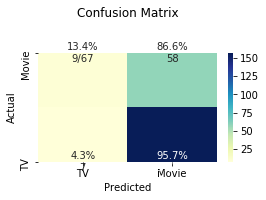

In [206]:
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

# cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
fgi, ax = plt.subplots(figsize=[4,2])
# fontPath = "/usr/share/fonts/abc.ttf"
# font2 = fm.FontProperties(fname=fontPath, size=24)
# fig.text(0.5, 0.93, "This is my Title", verticalalignment='center', fontproperties=font2)
sns.heatmap(cm, cmap="YlGnBu", annot=annot, fmt='', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix\n\n')
ax.xaxis.set_ticklabels(['TV', 'Movie']) 
ax.yaxis.set_ticklabels(['Movie', 'TV']);

## Linear Regression

In [172]:
from sklearn.linear_model import LogisticRegression

In [227]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

C:\Users\Shynar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
y_preds_regr = reg.predict(x_test)

In [229]:
print(classification_report(y_test, y_preds_regr))

              precision    recall  f1-score   support

       Movie       0.42      0.07      0.13        67
          TV       0.72      0.96      0.82       164

    accuracy                           0.70       231
   macro avg       0.57      0.52      0.47       231
weighted avg       0.63      0.70      0.62       231



In [230]:
reg.score(x_test, y_test)

0.7012987012987013

In [231]:
accuracy_score(y_test, y_preds_regr)

0.7012987012987013

## Naive Bayes

In [182]:
from sklearn.naive_bayes import GaussianNB

In [233]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [237]:
y_train_pred = nb.predict(x_train)
y_test_pred = nb.predict(x_test)

print('Training Accuracy : ',np.mean(y_train_pred==y_train))
print('Testing  Accuracy : ',np.mean(y_test_pred==y_test))

Training Accuracy :  0.5720476706392199
Testing  Accuracy :  0.5541125541125541


## Stochastic Gradient Descent

In [190]:
from sklearn.linear_model import SGDClassifier

In [191]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [194]:
y_pred_sgd = sgd.predict(x_test)

In [239]:
accuracy_score(y_test, y_pred_sgd)

0.7272727272727273

## Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier 

In [223]:
dtree = DecisionTreeClassifier(max_depth=10, max_features=None, random_state=101, min_samples_leaf=15)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [222]:
y_pred_dtree = dtree.predict(x_test)

In [240]:
accuracy_score(y_test, y_pred_dtree)

0.6753246753246753

## Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
rf = RandomForestClassifier(n_estimators=7,n_jobs=-1,max_features=None, random_state=101,min_samples_leaf=30)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=-1,
                       oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [226]:
y_pred_rf = rf.predict(x_test)

In [241]:
accuracy_score(y_test, y_pred_rf)

0.7142857142857143

## Support vector machine

In [209]:
from sklearn.svm import SVC

In [210]:
svc = SVC(kernel='linear',C=0.025,random_state=101)
svc.fit(x_train,y_train)

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=101,
    shrinking=True, tol=0.001, verbose=False)

In [211]:
y_pred_svc = svc.predict(x_test)

In [242]:
accuracy_score(y_test, y_pred_svc)

0.70995670995671